In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.4f}'.format
import matplotlib
from tqdm.notebook import tqdm


import sys
# adding notebooks to the system path
sys.path.insert(0, '/home/southark/notebooks')


matplotlib.rcParams['pdf.fonttype'] = 42
%load_ext autoreload
%autoreload 2
%matplotlib inline

from perturbseq import *
import scanpy as sc

In [13]:
LanesA = ['2A', '3A', '4A', '5A', '6A','10A', '11A', '12A', '13A', '14A']


LanesB = ['2B', '3B', '4B', '5B', '6B','10B', '11B', '12B', '13B', '14B']


Aggreation of GEX and Guide UMI data and export of raw GEX matrix and guide UMI .h5

In [14]:
EXPERIMENT = '/data/norman/southark/rpe1_tfs/202310_RPE1_TFs_CRa_more_seq/'

In [15]:
# List of names for each dataset
dataset_names = LanesA + LanesB

FILENAME = '/outs/filtered_feature_bc_matrix.h5'

# List of paths to the cellranger output folders
cellranger_output_paths = [EXPERIMENT+d+FILENAME for d in dataset_names]

cellranger_output_paths


['/data/norman/southark/rpe1_tfs/202310_RPE1_TFs_CRa_more_seq/2A/outs/filtered_feature_bc_matrix.h5',
 '/data/norman/southark/rpe1_tfs/202310_RPE1_TFs_CRa_more_seq/3A/outs/filtered_feature_bc_matrix.h5',
 '/data/norman/southark/rpe1_tfs/202310_RPE1_TFs_CRa_more_seq/4A/outs/filtered_feature_bc_matrix.h5',
 '/data/norman/southark/rpe1_tfs/202310_RPE1_TFs_CRa_more_seq/5A/outs/filtered_feature_bc_matrix.h5',
 '/data/norman/southark/rpe1_tfs/202310_RPE1_TFs_CRa_more_seq/6A/outs/filtered_feature_bc_matrix.h5',
 '/data/norman/southark/rpe1_tfs/202310_RPE1_TFs_CRa_more_seq/10A/outs/filtered_feature_bc_matrix.h5',
 '/data/norman/southark/rpe1_tfs/202310_RPE1_TFs_CRa_more_seq/11A/outs/filtered_feature_bc_matrix.h5',
 '/data/norman/southark/rpe1_tfs/202310_RPE1_TFs_CRa_more_seq/12A/outs/filtered_feature_bc_matrix.h5',
 '/data/norman/southark/rpe1_tfs/202310_RPE1_TFs_CRa_more_seq/13A/outs/filtered_feature_bc_matrix.h5',
 '/data/norman/southark/rpe1_tfs/202310_RPE1_TFs_CRa_more_seq/14A/outs/filtere

In [16]:
# Import the data from each folder and concatenate them into a single AnnData object
adata_list = []
for i, path in enumerate(cellranger_output_paths):
    print(i)
    adata = sc.read_10x_h5(path, gex_only=False)#import full matrix
    adata.var_names_make_unique()
    adata.obs['dataset'] = dataset_names[i]
    adata.obs['cell_barcode'] = adata.obs.index.str.split('-').str[0]
    adata.obs = adata.obs.reset_index().set_index('cell_barcode').rename(columns = {'index': 'old_barcode'})
    adata_list.append(adata)

0


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


1


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


2


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


3


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


4


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


6


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


7


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


8


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


9


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


10


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


11


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


12


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


13


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


14


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


15


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


16


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


17


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


18


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


19


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [17]:
adata_list[0].var.feature_types.value_counts()

Gene Expression         36601
CRISPR Guide Capture    10979
Name: feature_types, dtype: int64

In [18]:
adata = adata_list[0].concatenate(adata_list[1:], join='outer') #use if working from count

In [19]:
adata_guides = adata[:,adata.var['feature_types'].isin(['CRISPR Guide Capture'])]

#take gex only for gex output
adata_gex = adata[:,adata.var['feature_types'].isin(['Gene Expression'])]

In [20]:
adata_guides.var = adata_guides.var.rename(columns={'gene_ids': 'guide_identity'}).reset_index().set_index('guide_identity').rename(columns={'index': 'guide_target'})
adata_guides.var['guide_target'] = adata_guides.var.guide_target.map(lambda x: x.split('-')[0])
adata_guides.var

,guide_target,feature_types,genome
guide_identity,,,
AATF_GGAAGCGCGCAGAAGGTTGA,AATF,CRISPR Guide Capture,
AATF_GCGTGCGAGTGCGCGGGAAG,AATF,CRISPR Guide Capture,
AATF_GCGCAGAAGGTTGAAGGGAT,AATF,CRISPR Guide Capture,
AATF_GGGCGTTGCTAGCATGAAGG,AATF,CRISPR Guide Capture,
AATF_GTGAAGGGATTGGAGCCGTA,AATF,CRISPR Guide Capture,
...,...,...,...
non_targeting_GAACGGGCCGTGATCGGACC,non_targeting,CRISPR Guide Capture,
non_targeting_GGCCCTCCCCACCGGCACGA,non_targeting,CRISPR Guide Capture,
non_targeting_GTCGTTATCTCGCTATTTCG,non_targeting,CRISPR Guide Capture,


In [21]:
adata_guides.X

<1075407x10979 sparse matrix of type '<class 'numpy.float32'>'
	with 25461240 stored elements in Compressed Sparse Row format>

In [22]:
chunk_size = 1000

# Create a generator object that yields chunks of the masked dataframe
chunks = (adata_guides[chunk] for chunk in adata_guides.chunked_X(chunk_size=chunk_size))

# Create an empty list to store the stacked chunks
stacked_list = []

# Iterate over the chunks mask and stack them
for chunk in adata_guides.chunked_X(chunk_size=chunk_size):
    df_chunk = adata_guides[chunk[1]:chunk[2],].to_df()
    print((chunk[1],chunk[2]))
    m = df_chunk > 0
    masked_chunk = df_chunk.mask(~m)
    stacked_chunk = masked_chunk.stack()
    stacked_list.append(stacked_chunk)        
        
guide_umis = pd.concat(stacked_list)

(0, 1000)
(1000, 2000)
(2000, 3000)
(3000, 4000)
(4000, 5000)
(5000, 6000)
(6000, 7000)
(7000, 8000)
(8000, 9000)
(9000, 10000)
(10000, 11000)
(11000, 12000)
(12000, 13000)
(13000, 14000)
(14000, 15000)
(15000, 16000)
(16000, 17000)
(17000, 18000)
(18000, 19000)
(19000, 20000)
(20000, 21000)
(21000, 22000)
(22000, 23000)
(23000, 24000)
(24000, 25000)
(25000, 26000)
(26000, 27000)
(27000, 28000)
(28000, 29000)
(29000, 30000)
(30000, 31000)
(31000, 32000)
(32000, 33000)
(33000, 34000)
(34000, 35000)
(35000, 36000)
(36000, 37000)
(37000, 38000)
(38000, 39000)
(39000, 40000)
(40000, 41000)
(41000, 42000)
(42000, 43000)
(43000, 44000)
(44000, 45000)
(45000, 46000)
(46000, 47000)
(47000, 48000)
(48000, 49000)
(49000, 50000)
(50000, 51000)
(51000, 52000)
(52000, 53000)
(53000, 54000)
(54000, 55000)
(55000, 56000)
(56000, 57000)
(57000, 58000)
(58000, 59000)
(59000, 60000)
(60000, 61000)
(61000, 62000)
(62000, 63000)
(63000, 64000)
(64000, 65000)
(65000, 66000)
(66000, 67000)
(67000, 68000)
(6

In [23]:
guide_umis[guide_umis >= 5]

cell_barcode         guide_identity             
AAACCCAAGACCAGAC-0   ESRRA_GGCGCCCGGACGAGTCGGGG      7.0000
                     HNF1A_GGGGAGCTATGGCCTGCGAT    525.0000
AAACCCAAGCAACTCT-0   AHRR_GCCGAGACAGCCGGACCCGC       9.0000
                     HNF4G_GCGGCCTCCCGAGACCGCAG    597.0000
                     ZNF606_GCGGCGCCGCTGCCCGACGC    22.0000
                                                     ...   
TTTGTTGTCTCGTGGG-19  GTF2H3_GCACTTCCGTACCCCTCTTC   300.0000
                     POU3F2_GATACCGCTAGCAACCTCCC    22.0000
                     ZNF568_GCGCCTGGGCCCACCCGAAA   443.0000
TTTGTTGTCTTGGTGA-19  NR2E1_GGAGGGGAATAGGGCGTCCC    138.0000
                     PCGF2_GGGTCACGTGGGTGAGTGGT     35.0000
Length: 2775286, dtype: float32

In [24]:
guide_umis.tail(20)

cell_barcode         guide_identity                    
TTTGTTGTCTCGTGGG-19  PLAG1_GCGAGTGGCCAGCTCTCGGG             1.0000
                     POU3F2_GATACCGCTAGCAACCTCCC           22.0000
                     TAF1A_GCGAAGGGAGCATTCAAAAG             1.0000
                     THAP1_GGGCTTCAGAGTTGCCGAAG             1.0000
                     WIZ_GCCGCCGCGCCGCCATGATG               1.0000
                     ZFPM1_GGAGCAGGCGGCCACTGCGA             1.0000
                     ZNF568_GCGCCTGGGCCCACCCGAAA          443.0000
TTTGTTGTCTTGGTGA-19  CDX2_GGGGGAGGGAGGCTCGTGAG              1.0000
                     ERF_GCACTCACACACACGCTCGT               1.0000
                     HOXA4_GGGTGGCGGCGTCTGCGGGA             1.0000
                     ID4_GACGCTCGGGCCAATGGGAA               1.0000
                     NR2E1_GGAGGGGAATAGGGCGTCCC           138.0000
                     PCGF2_GGGTCACGTGGGTGAGTGGT            35.0000
                     PRDM16_GCGGCGGCGGCGCGACGATG            1.0000
      

In [25]:
guide_umis.index.names = ['cell_barcode', 'guide_identity']

In [26]:
all_guides = guide_umis.reset_index().set_index('cell_barcode')

In [27]:
all_guides[0]

cell_barcode
AAACCCAAGACCAGAC-0    1.0000
AAACCCAAGACCAGAC-0    1.0000
AAACCCAAGACCAGAC-0    1.0000
AAACCCAAGACCAGAC-0    1.0000
AAACCCAAGACCAGAC-0    1.0000
                       ...  
TTTGTTGTCTTGGTGA-19   1.0000
TTTGTTGTCTTGGTGA-19   1.0000
TTTGTTGTCTTGGTGA-19   1.0000
TTTGTTGTCTTGGTGA-19   1.0000
TTTGTTGTCTTGGTGA-19   1.0000
Name: 0, Length: 25461240, dtype: float32

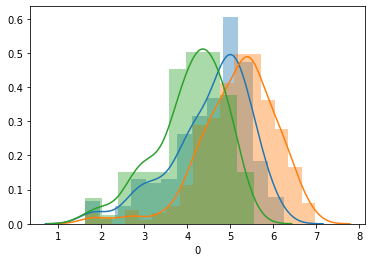

In [28]:
sns.distplot(np.log(all_guides[(all_guides.guide_identity == 'ZNF791_GTCAACACAATTGTCCACGG')&(all_guides[0] >= 5)][0]))
sns.distplot(np.log(all_guides[(all_guides.guide_identity == 'ZNF786_GGAGGCGCTGTAGGACTGAG')&(all_guides[0] >= 5)][0]))
sns.distplot(np.log(all_guides[(all_guides.guide_identity == 'POU3F2_GATACCGCTAGCAACCTCCC')&(all_guides[0] >= 5)][0]))

/lila/home/southark/notebooks/envs/barcode_fuzz/analysisKS01/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


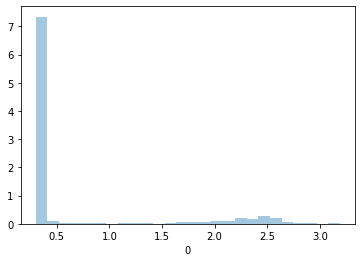

In [29]:
sns.distplot(np.log10(all_guides[(all_guides.guide_identity == 'NKX2-4_GTCTGTCGTAAACCTGGCGC')&(all_guides[0] >= 1)][0]+1))


/lila/home/southark/notebooks/envs/barcode_fuzz/analysisKS01/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


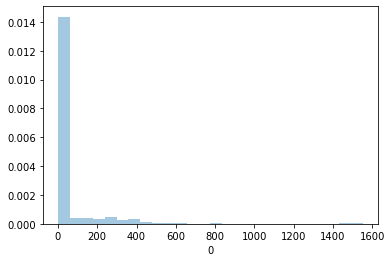

In [30]:
sns.distplot(all_guides[(all_guides.guide_identity == 'NKX2-4_GTCTGTCGTAAACCTGGCGC')&(all_guides[0] >= 1)][0])


# Export guide calls
for each sample import cell calls list

In [31]:
output_path = '/data/norman/southark/tfs_standardized/'

date = '240118'

cells = 'RPE1'

cas = 'CRISPRa'

guide_umis.to_hdf(output_path+f'{date}_{cells}_{cas}_aggr_total_guide_umis.h5', key='guide_umis', mode='w')

guide_umis[guide_umis >= 5].to_hdf(output_path+f'{date}_{cells}_{cas}_aggr_thres5_guide_umis.h5', key='guide_umis', mode='w')

# Export GEX (raw)

In [32]:
#export raw gex aggr, no metadata formating

adata_raw = adata[:,adata.var['feature_types'].isin(['Gene Expression'])].copy()

adata_raw.write_h5ad(output_path+f'{date}_{cells}_{cas}_raw_scanpy_aggr.h5ad')

... storing 'old_barcode' as categorical
... storing 'dataset' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


# Create GEX matrix with some preliminary metadata

In [33]:
filtered_guide_umis = guide_umis[guide_umis >= 5]

In [34]:
filtered_guide_umis = filtered_guide_umis.reset_index().rename(columns = {0:'guide_umi_count'})
filtered_guide_umis['guide_umi_count'] = filtered_guide_umis['guide_umi_count'].astype('int')

In [35]:
#set top guide id for each droplet with called cells and format cell identity matrix
cell_identities = filtered_guide_umis.sort_values('guide_umi_count', ascending = False).groupby('cell_barcode').first()
cell_identities['guide_umi_count'] = cell_identities['guide_umi_count'].astype('int')

all_guides = filtered_guide_umis.groupby('cell_barcode').guide_identity.apply(lambda x: '|'.join(x))
all_guide_umi = filtered_guide_umis.groupby('cell_barcode').guide_umi_count.apply(lambda x: '|'.join(x.astype(str)))

num_cells = filtered_guide_umis.groupby('cell_barcode').guide_identity.count()

cell_identities['thresholded_features'] = all_guides
cell_identities['thresholded_guide_umi'] = all_guide_umi

cell_identities['num_cells'] = num_cells

cell_identities.head()

,guide_identity,guide_umi_count,thresholded_features,thresholded_guide_umi,num_cells
cell_barcode,,,,,
AAACCCAAGAAACCAT-18,POU3F2_GGCGGGGCCCATCCGAGAGA,790,POU3F2_GGCGGGGCCCATCCGAGAGA,790,1
AAACCCAAGAAACCCG-18,VAV1_GGCCCAGGCCTGTGTCGAGT,1159,PMS1_GGCCTGAGGGCGTGTATCCG|VAV1_GGCCCAGGCCTGTGT...,560|1159|94|372|175|324,6
AAACCCAAGAAATGGG-16,FOXF2_GAGCGAGGAGCGCTCCTGAA,3582,FOXF2_GAGCGAGGAGCGCTCCTGAA|TAF2_GGCCAGGTATAAAT...,3582|113|668,3
AAACCCAAGAACTGAT-18,TRIM33_GCGCGGGCGCGGAGCGGTCC,1068,TRIM33_GCGCGGGCGCGGAGCGGTCC,1068,1
AAACCCAAGAAGCGGG-15,non_targeting_GACCACCGACGCGTTACGCA,1965,non_targeting_GACCACCGACGCGTTACGCA,1965,1


In [36]:
adata_gex.var = adata_gex.var.rename(columns={'gene_ids': 'gene_id'}).reset_index().set_index('gene_id').rename(columns={'index': 'gene_name'})

adata_gex.obs['UMI_count'] = adata_gex.X.sum(axis=1)

adata_gex.obs = pd.merge(adata_gex.obs, cell_identities, left_index=True, right_index=True, how='left')

#remove droplets without a guide assignment
adata_gex = adata_gex[~adata_gex.obs['thresholded_features'].isnull()].copy()

In [37]:
adata_gex.var['mean'] = pd.Series(adata_gex.X.mean(axis=0).A.flatten(), index=adata_gex.var.index)

#adata_gex = adata_gex[:, adata_gex.var['mean'] >= 0.05].copy() do not do this!!! (this was the culprit)
#adata_gex.var['in_matrix'] = True

# EXPORT GEX with guide assignments

here thresdholded features is formated like the feature calls from 10x, but is created from the actual guide calls using raw UMI counts

In [38]:
#write out scanpy file with metdadata
adata_gex.write_h5ad(output_path+f'{date}_{cells}_{cas}_scanpy_from_cellranger_aggr_singlets_and_multiplets_5umi_guide_thresh.h5ad')

... storing 'old_barcode' as categorical
... storing 'dataset' as categorical
... storing 'guide_identity' as categorical
... storing 'thresholded_features' as categorical
... storing 'thresholded_guide_umi' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


In [39]:
adata_gex.obs

,old_barcode,dataset,batch,UMI_count,guide_identity,guide_umi_count,thresholded_features,thresholded_guide_umi,num_cells
cell_barcode,,,,,,,,,
AAACCCAAGACCAGAC-0,AAACCCAAGACCAGAC-1,2A,0,4444.0000,HNF1A_GGGGAGCTATGGCCTGCGAT,525.0000,ESRRA_GGCGCCCGGACGAGTCGGGG|HNF1A_GGGGAGCTATGGC...,7|525,2.0000
AAACCCAAGCAACTCT-0,AAACCCAAGCAACTCT-1,2A,0,6312.0000,HNF4G_GCGGCCTCCCGAGACCGCAG,597.0000,AHRR_GCCGAGACAGCCGGACCCGC|HNF4G_GCGGCCTCCCGAGA...,9|597|22,3.0000
AAACCCAAGCCATCCG-0,AAACCCAAGCCATCCG-1,2A,0,13271.0000,RARB_GAACGCGAGCGATCCGAGCA,857.0000,FOXI2_GGGGACGGATCGCACAAAGG|RARB_GAACGCGAGCGATC...,5|857|833|10,4.0000
AAACCCAAGCTAAATG-0,AAACCCAAGCTAAATG-1,2A,0,5122.0000,OTP_GGGAGCCTGGAGAAAATCGC,931.0000,OTP_GGGAGCCTGGAGAAAATCGC,931,1.0000
AAACCCAAGGATACGC-0,AAACCCAAGGATACGC-1,2A,0,5378.0000,MIER2_GAGCGGGCCGGGCGCGTAGT,15.0000,MIER2_GAGCGGGCCGGGCGCGTAGT,15,1.0000
...,...,...,...,...,...,...,...,...,...
TTTGTTGTCTAAGCCA-19,TTTGTTGTCTAAGCCA-1,14B,19,7610.0000,GTF2E1_GGCGTGACTGTCTTGATCGA,1149.0000,DACH2_GGGTAGTCGGACGCCGGCCA|GTF2E1_GGCGTGACTGTC...,57|1149,2.0000
TTTGTTGTCTAGAACC-19,TTTGTTGTCTAGAACC-1,14B,19,15512.0000,ZNF439_GCCCTGGGTATCAGGCCCTG,1616.0000,FOXN3_GGCGCCCCAGCACTCAGCCA|MIER1_GGTGCCGCCAGCC...,223|415|202|6|480|1616|169,7.0000
TTTGTTGTCTCGGTAA-19,TTTGTTGTCTCGGTAA-1,14B,19,4923.0000,ZNF483_GCCCAGTGACCATGCGCAAC,360.0000,ZNF483_GCCCAGTGACCATGCGCAAC,360,1.0000


In [40]:
adata_gex.var.sort_values('mean').head(500).tail(50)

,gene_name,feature_types,genome,mean
gene_id,,,,
ENSG00000226699,AL360181.1,Gene Expression,GRCh38,0.0000
ENSG00000287327,AL731769.1,Gene Expression,GRCh38,0.0000
ENSG00000237035,AC020719.1,Gene Expression,GRCh38,0.0000
ENSG00000254468,AC069287.1,Gene Expression,GRCh38,0.0000
ENSG00000255229,AC069287.3,Gene Expression,GRCh38,0.0000
ENSG00000188076,SCGB1C1,Gene Expression,GRCh38,0.0000
ENSG00000174885,NLRP6,Gene Expression,GRCh38,0.0000
ENSG00000286275,AC061979.1,Gene Expression,GRCh38,0.0000
ENSG00000196224,KRTAP5-3,Gene Expression,GRCh38,0.0000
